Imports

In [155]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [156]:
df = pd.read_csv("./stroke.csv")
df.drop(columns=["Unnamed: 0"], inplace=True)

In [157]:
df.head(5)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,29.065758,never smoked,1
1,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
2,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
3,10434,Female,69,0,0,No,Private,Urban,94.39,22.800000,never smoked,1
4,27419,Female,59,0,0,Yes,Private,Rural,76.15,29.065758,Unknown,1


## Descriptive Statistics

Looking at the highs and lows of our datasets. Finding our averages and data variability.

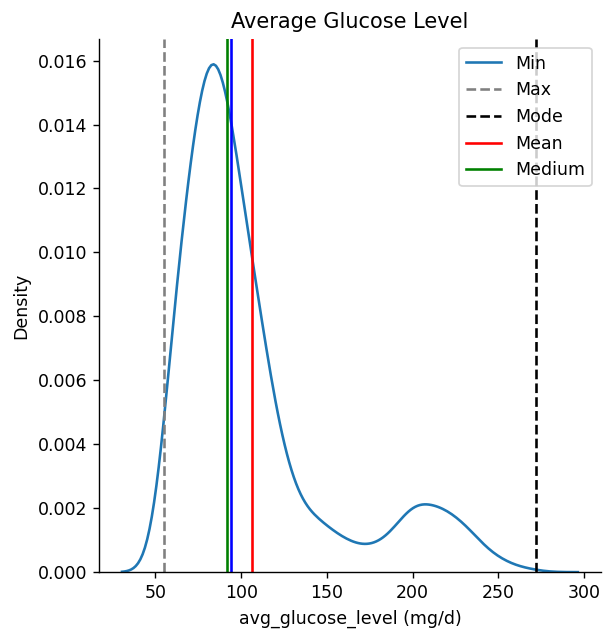

In [158]:
sns.displot(df, x="avg_glucose_level", kind="kde").fig.set_dpi(125)
plt.title("Average Glucose Level")
plt.xlabel("avg_glucose_level (mg/d)")

min_gl = df.avg_glucose_level.min()
max_gl = df.avg_glucose_level.max()
mean_gl = df.avg_glucose_level.mean()
median_gl = df.avg_glucose_level.median()
mode_gl = df.avg_glucose_level.mode()[0]

plt.axvline(x= min_gl, color="grey", linestyle='--')
plt.axvline(x= max_gl, color="black", linestyle='--')
plt.axvline(x= mean_gl, color="red")
plt.axvline(x= median_gl, color="green")
plt.axvline(x= mode_gl, color="blue")

plt.legend(['Min','Max','Mode', 'Mean', "Medium"], loc="upper right")

plt.show()

#print(min_gl, max_gl, mean_gl, median_gl, mode_gl)

### Average Glucose Levels in our Dataset 
- Minimum: 55.12 mg/d
- Maximum: 271.74 mg/d
- Mean: 106.14 mg/d
- Median: 91.88 mg/d
- Mode: 93.88 mg/d

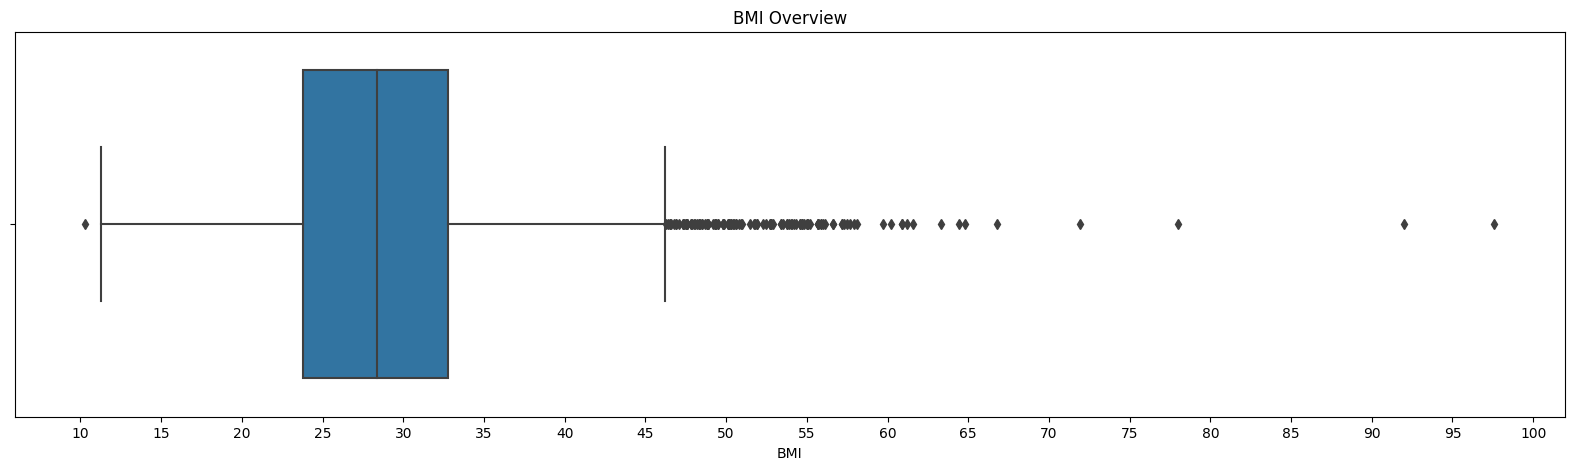

10.3 97.6 28.892789954081536 28.4 28.64793635007459


In [171]:
plt.figure(figsize=(20,5))

sns.boxplot(x=df["bmi"])
plt.title("BMI Overview")
plt.xlabel("BMI")

min_bmi = df.bmi.min()
max_bmi = df.bmi.max()
mean_bmi = df.bmi.mean()
median_bmi = df.bmi.median()
mode_bmi = df.bmi.mode()[0]

plt.xticks(np.arange(min_bmi-.3, max_bmi+5, 5))
plt.show()

#print(min_bmi, max_bmi, mean_bmi, median_bmi, mode_bmi)

10.3 97.6 28.892789954081536 28.4 28.64793635007459

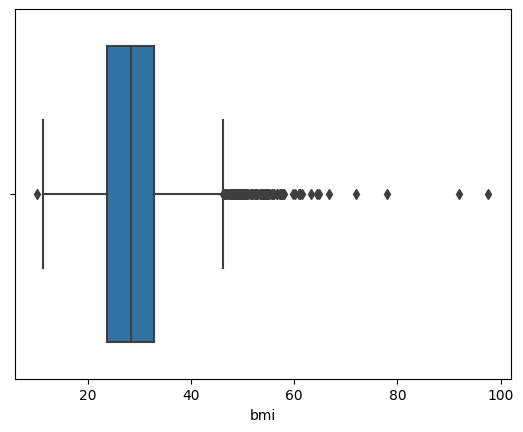

In [160]:
sns.boxplot(x=df["bmi"])
plt.show()

In [161]:
#first we're going to need to turn out categorical data into numeric
int_df = df.drop(columns=["id"])

cols=int_df.select_dtypes(include=['object']).columns
print(cols)
# This code will fetch columns whose data type is object.
le=LabelEncoder()
# Initializing our Label Encoder object
int_df[cols]=int_df[cols].apply(le.fit_transform)
# Transfering categorical data into numeric
print(int_df.head(10))

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')
   gender  age  hypertension  heart_disease  ever_married  work_type   
0       0   61             0              0             1          3  \
1       0   49             0              0             1          2   
2       0   79             1              0             1          3   
3       0   69             0              0             0          2   
4       0   59             0              0             1          2   
5       0   78             0              0             1          2   
6       0   81             1              0             1          2   
7       0   61             0              1             1          0   
8       0   54             0              0             1          2   
9       0   79             0              1             1          2   

   Residence_type  avg_glucose_level        bmi  smoking_status  stroke  
0               0    

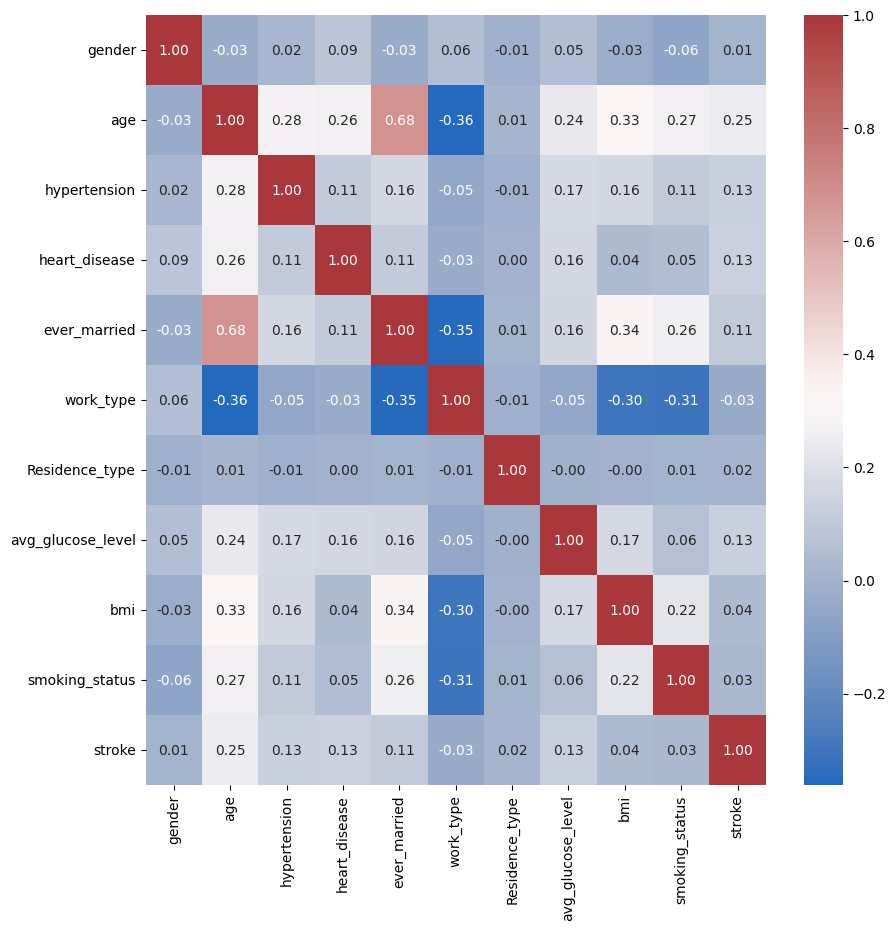

In [162]:
correl = int_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correl, 
            annot=True, fmt=".2f",
            xticklabels=correl.columns.values,
            yticklabels=correl.columns.values, cmap= 'vlag')
plt.show()

In [163]:
no_stroke=df.query("stroke == 0")
no_stroke

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
141,16523,Female,8,0,0,No,Private,Urban,110.89,17.600000,Unknown,0
142,56543,Female,70,0,0,Yes,Private,Rural,69.04,35.900000,formerly smoked,0
143,32257,Female,47,0,0,Yes,Private,Urban,210.95,50.100000,Unknown,0
144,52800,Female,52,0,0,Yes,Private,Urban,77.59,17.700000,formerly smoked,0
145,41413,Female,75,0,1,Yes,Self-employed,Rural,243.53,27.000000,never smoked,0
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,64520,Male,68,0,0,Yes,Self-employed,Urban,91.68,40.800000,Unknown,0
5105,579,Male,9,0,0,No,children,Urban,71.88,17.500000,Unknown,0
5106,7293,Male,40,0,0,Yes,Private,Rural,83.94,28.647936,smokes,0
5107,68398,Male,82,1,0,Yes,Self-employed,Rural,71.97,28.300000,never smoked,0


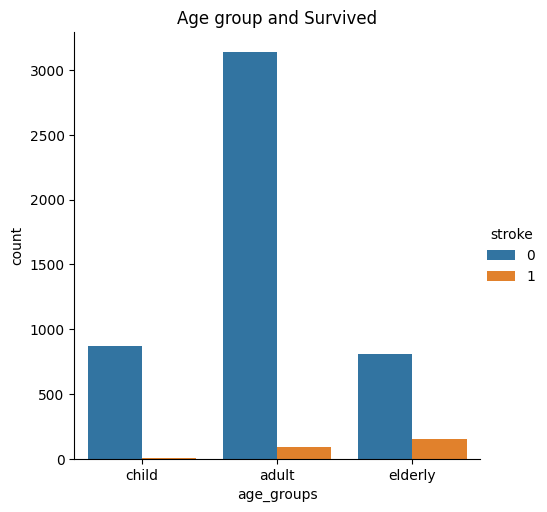

In [164]:
age_groups = [0,18,65,100]
age_names = ['child', 'adult', 'elderly']


#making age groups by creating bins
df['age_groups'] = pd.cut(x=df['age'], bins=age_groups, labels=age_names)


sns.catplot(x='age_groups', data=df, hue="stroke", kind="count").set(title='Age group and Survived')
plt.show()

<Axes: xlabel='age', ylabel='gender'>

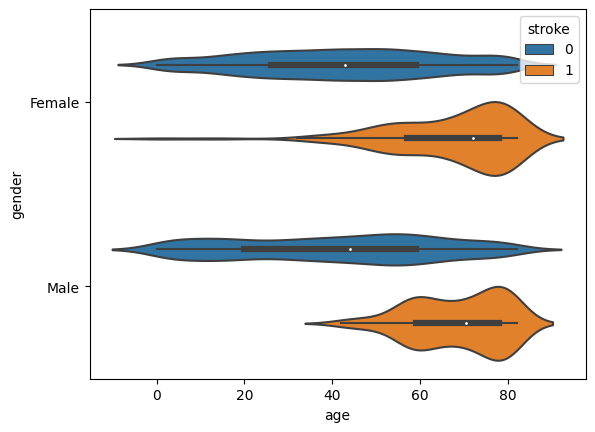

In [165]:
sns.violinplot(data=df, x="age", y="gender", hue="stroke", )

In [166]:
stroke=df.query("stroke == 1" and "gender == 'Female'")["age"].min()
stroke

0

In [167]:
df.query("stroke == 1" and "gender == 'Female'")["age"]

0       61
1       49
2       79
3       69
4       59
        ..
2989    13
2990    80
2991    81
2992    35
2993    44
Name: age, Length: 2994, dtype: int64

In [168]:
min(df.query("stroke == 1 and gender == 'Female'")["age"])

1

In [169]:
df.query("stroke == 1 and gender == 'Male'")

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_groups
2994,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1,elderly
2995,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1,elderly
2996,56669,Male,81,0,0,Yes,Private,Urban,186.21,29.000000,formerly smoked,1,elderly
2997,53882,Male,74,1,1,Yes,Private,Rural,70.09,27.400000,never smoked,1,elderly
2998,8213,Male,78,0,1,Yes,Private,Urban,219.84,28.647936,Unknown,1,elderly
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3097,10548,Male,66,0,0,Yes,Private,Rural,76.46,21.200000,formerly smoked,1,elderly
3098,52282,Male,57,0,0,Yes,Private,Rural,197.28,34.500000,formerly smoked,1,adult
3099,45535,Male,68,0,0,Yes,Private,Rural,233.94,42.400000,never smoked,1,elderly
3100,17739,Male,57,0,0,Yes,Private,Rural,84.96,36.700000,Unknown,1,adult


In [170]:
df.query("stroke == 1 and gender == 'Female' and age == 1")

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_groups
95,69768,Female,1,0,0,No,children,Urban,70.37,29.065758,Unknown,1,child
